# Social dimensions of Eaton and Palisades fires
Week 8 - Discussion section

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import geopandas as gpd
import contextily as ctx

In [ ]:
cali = gpd.read_file(os.path.join("data/EJI_2024_California/EJI_2024_California.gdb"))
# Eaton and Palisades fire parmeters
eaton = gpd.read_file(os.path.join("data/eaton_perimeter/Eaton_Perimeter_20250121.shp"))

palisades = gpd.read_file(os.path.join("data/palisades_perimeter/Palisades_Perimeter_20250121.shp"))

# 1. Metadata exploration
Review the CSV with the metadata information for the EJI data.
Look at the variables and with your team select a few variables that, in your opinion, could influence a community’s response to a wildfire. You’ll be working with some of them in the following exercises.

# 2. Polygon intersection
a. Open the fire perimeters and the EJI data and do initial data exploration.

b. Spatially join the EJI data with the Palisades fire perimeter using `geopandas.sjoin()` to get a `geopandas.GeoDataFrame` that will have only have the census tracts intersecting the Palisades fire perimeter.

c. Create an exploratory map showing

    1. the census tracts that intersect the Palisades fire perimeter and
    2. the Palisades fire perimeter.

Discuss how big is the Palisades fire perimeter in relation to the census tracts.

d. Create the corresponding `geopandas.GeoDataFrame` and exploratory map for the Eaton fire.

Discuss how big is the Eaton fire perimeter in relation to the census tracts intersectig the Eaton fire perimeter.

<Axes: >

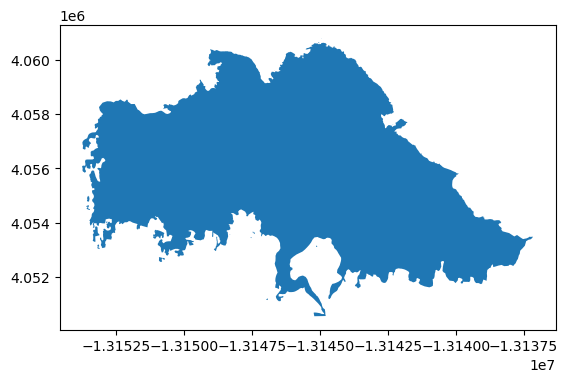

In [ ]:
eaton.plot()

In [ ]:
eaton.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [ ]:
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


<Axes: >

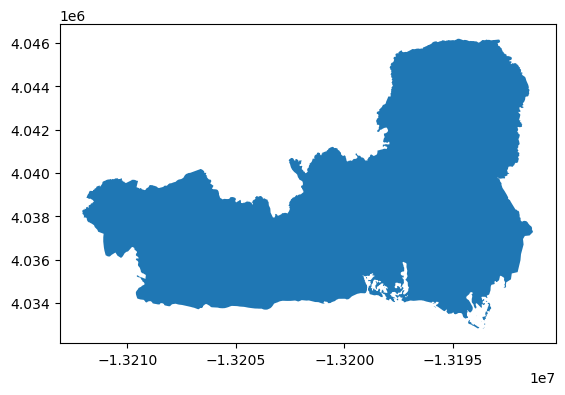

In [ ]:
palisades.plot()

<Axes: >

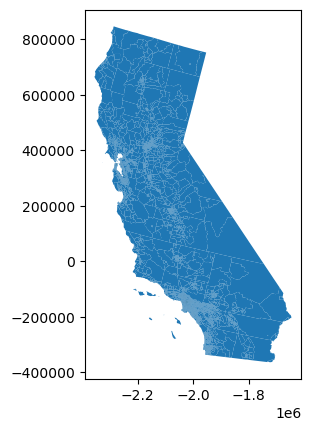

In [ ]:
cali.plot()

In [ ]:
cali.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9109 entries, 0 to 9108
Columns: 174 entries, OBJECTID to geometry
dtypes: float64(147), geometry(1), int64(15), object(11)
memory usage: 12.1+ MB


b. Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

In [ ]:
print(f"Eaton crs:{eaton.crs}")
print(f"Palisades crs:{palisades.crs}")
print(f"California crs:{cali.crs}")

Eaton crs:EPSG:3857
Palisades crs:EPSG:3857
California crs:PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [ ]:
cali = cali.to_crs(palisades.crs)

In [ ]:
palisadesjoin = gpd.sjoin(cali, palisades)

In [ ]:
eatonjoin = gpd.sjoin(cali, eaton)

c. Create an exploratory map showing

1. the census tracts that intersect the Palisades fire perimeter and
2. the Palisades fire perimeter.
Discuss how big is the Palisades fire perimeter in relation to the census tracts.

<Axes: >

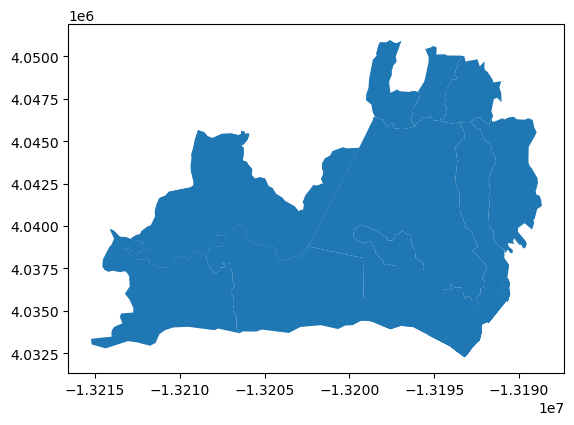

In [ ]:
palisadesjoin.plot()

<Axes: >

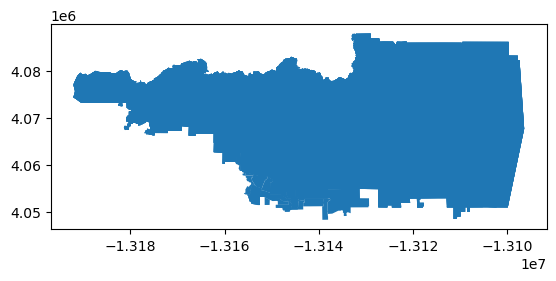

In [ ]:
eatonjoin.plot()

# 3. Polygon clipping
a. Clip the census tracts to the Palisades fire perimeter using geopandas.clip().
b. Do the same for the Eaton fire perimeter.
c. Quickly visualize your data.

Discuss with your group the difference between a spatial join (step 2) and clipping (step 3). Make sure you understand the difference and what your goal is when transforming geospatial data!

In [ ]:
# a. 
pali_clip = gpd.clip(cali, palisades)

In [ ]:
# b.
eaton_clip = gpd.clip(cali, eaton)

<Axes: >

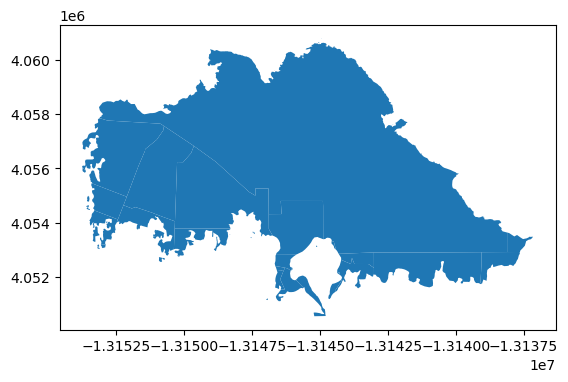

In [ ]:
eaton_clip.plot()

<Axes: >

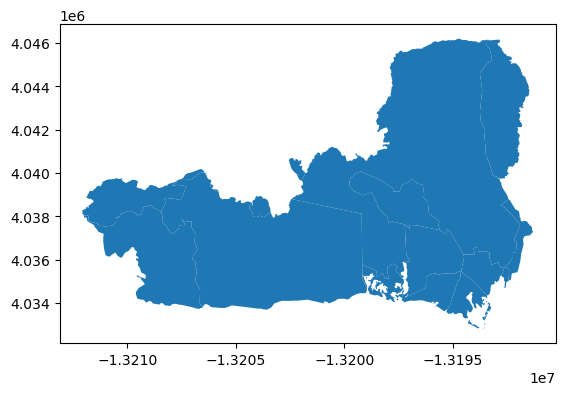

In [ ]:
pali_clip.plot()

# 4. Visualize fire perimeters with a basemap
To add a basemap to our plot we will be using the contextily library.

    a. Import the contextily library at the top of your notebook as ctx. This library is already installed in the EDS 220 environment.

    b. Use and update the code below to plot the fire perimeters adding a basemap:

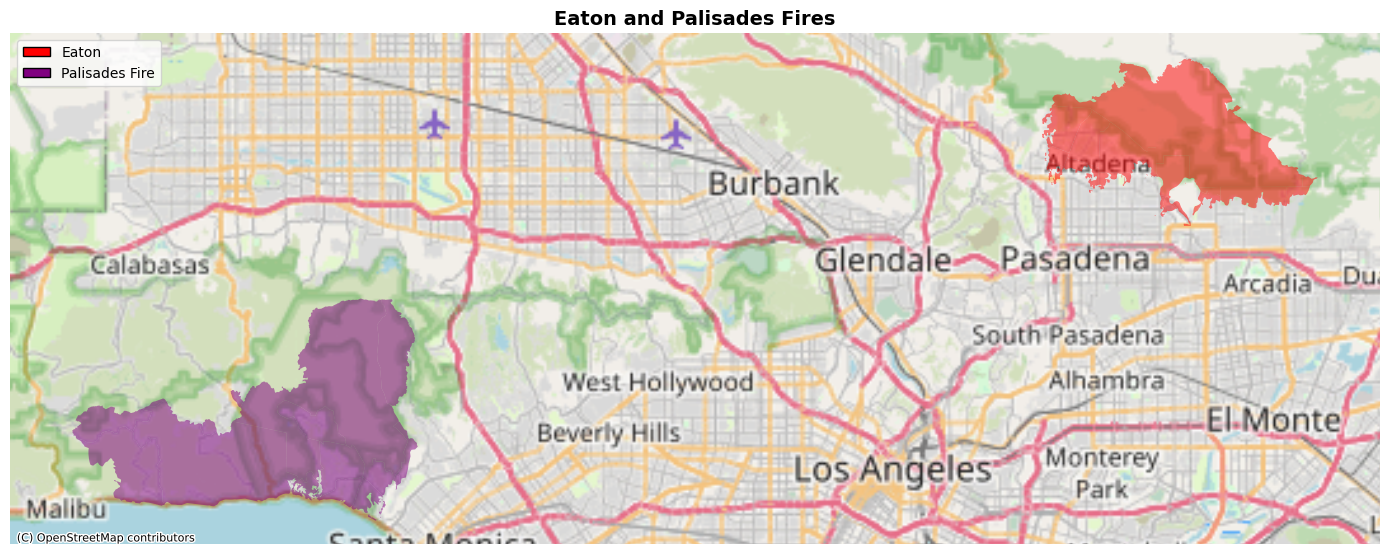

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
eaton_clip.plot(ax=ax, alpha = 0.5, color = "red")
pali_clip.plot(ax =ax, alpha = 0.5, color = "purple")

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE
# add Legend
eaton_patch = mpatches.Patch(facecolor = "red", edgecolor = "black", label= "Eaton")
palisades_patch = mpatches.Patch(facecolor = "purple", edgecolor = "black", label= "Palisades Fire" )
ax.legend(handles = [eaton_patch, palisades_patch], loc='upper left', fontsize= 10) 

# ADD TITLE
ax.set_title('Eaton and Palisades Fires', 
             fontsize=14, fontweight='bold')
ax.axis('off')
plt.tight_layout()
# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

# 5. Visualize EJI data
    a. Use and update the code below to plot one of the variables you and your team explored in step 1 as being relevant to a community’s response to a wildfire.

NameError: name 'eji_palisades' is not defined

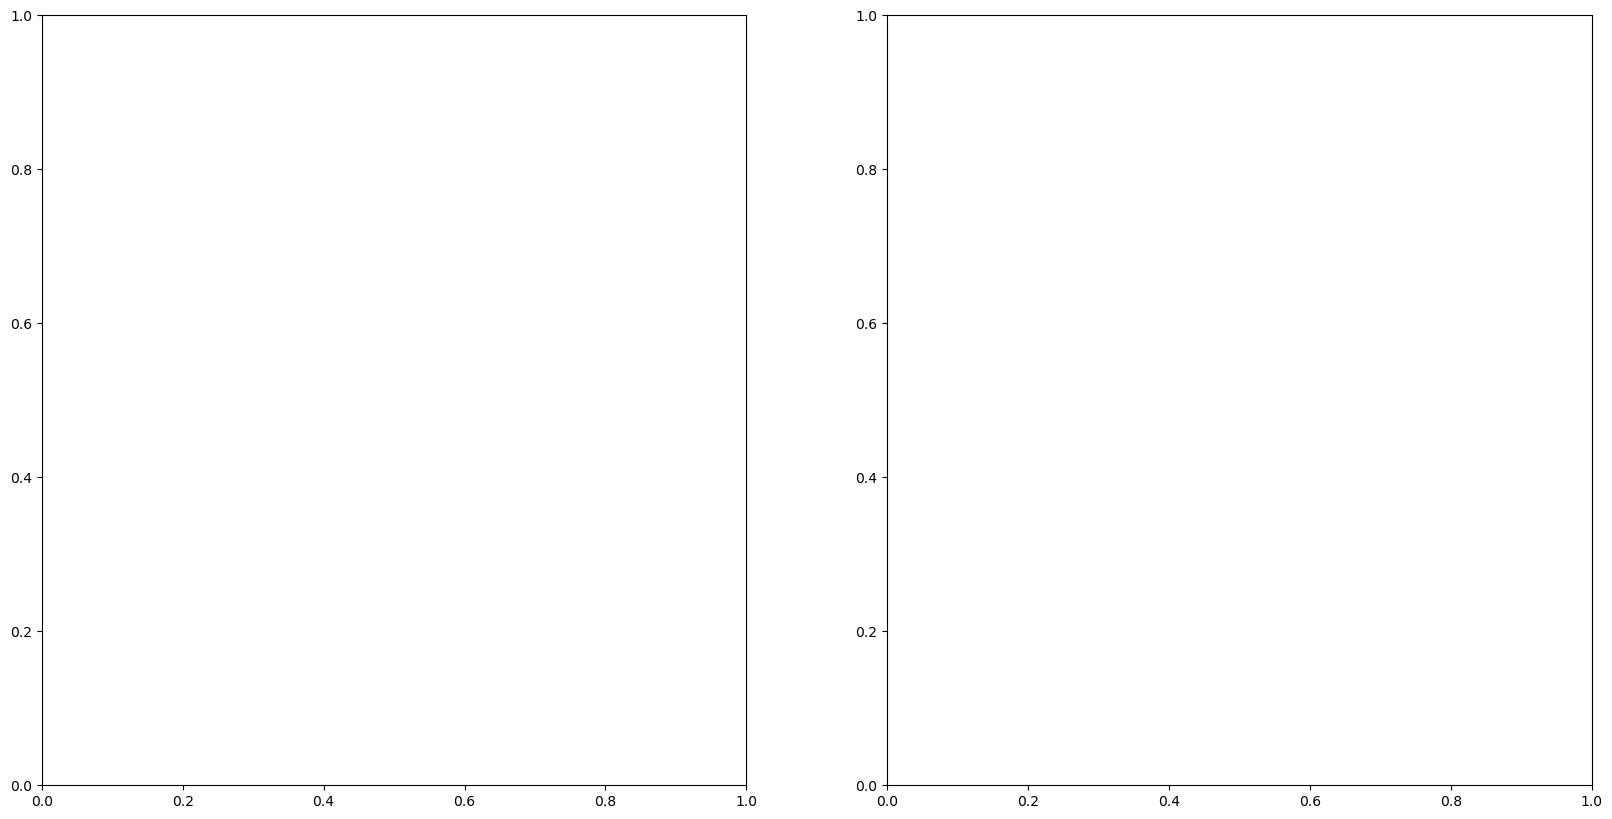

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = ''

# Find common min/max for legend range
vmin = min(palisadesjoin[cali].min(), eatonjoin[cali].min())
vmax = max(palisadesjoin[cali].max(), eatonjoin[cali].max())

# Plot census tracts within Palisades perimeter
census_within_palisades.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('UPDATE TITLE')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
census_within_eaton.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('UPDATE TITLE')
ax2.axis('off')

# Add overall title
fig.suptitle('YOUR VARIABLE HERE - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('YOUR VARIABLE HERE (WITH UNITS)')

plt.show()

With your team, write a short paragraph discussing how or whether this variable is distributed differently across the two fire perimeters. What kind of implications could this have in terms of wildifre relief?